In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM

In [4]:
df1=pd.read_csv("fashion-mnist_train.csv")
df2=pd.read_csv("fashion-mnist_test.csv")

In [12]:
df1.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df=pd.concat([df1,df2])

In [6]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 419.8 MB


In [9]:
df.shape

(70000, 785)

In [11]:
df.corr()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,1.000000,-0.000508,0.001290,-0.008177,-0.007394,-0.005012,-0.010227,-0.036948,-0.085670,-0.160584,...,-0.362640,-0.258031,-0.182729,-0.091354,-0.078135,-0.067700,-0.018476,0.044488,0.059432,0.022674
pixel1,-0.000508,1.000000,0.235345,0.052023,0.043758,0.024341,0.024281,0.011074,0.011496,0.009601,...,-0.000148,0.004941,0.005101,0.001770,-0.001763,-0.001748,0.000671,0.009051,0.025263,0.038746
pixel2,0.001290,0.235345,1.000000,0.735187,0.260507,0.137166,0.094008,0.064546,0.040248,0.029553,...,0.005982,0.011222,0.014550,0.010516,0.003255,0.004453,0.013688,0.032543,0.023733,0.016146
pixel3,-0.008177,0.052023,0.735187,1.000000,0.443257,0.177545,0.129482,0.090353,0.052985,0.038063,...,0.013975,0.020938,0.024240,0.013951,0.003807,0.006157,0.017130,0.033537,0.015398,0.011338
pixel4,-0.007394,0.043758,0.260507,0.443257,1.000000,0.587462,0.341983,0.247476,0.142343,0.086869,...,0.011499,0.020332,0.024769,0.017619,0.010496,0.009885,0.022918,0.015932,0.003516,0.007272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel780,-0.067700,-0.001748,0.004453,0.006157,0.009885,0.017808,0.028454,0.025287,0.018827,0.025410,...,-0.072487,-0.006831,0.044500,0.339228,0.792943,1.000000,0.748887,0.343657,0.173351,0.073048
pixel781,-0.018476,0.000671,0.013688,0.017130,0.022918,0.022238,0.033700,0.026869,0.023445,0.033724,...,-0.041103,0.010311,0.046522,0.134909,0.443272,0.748887,1.000000,0.642443,0.328076,0.134292
pixel782,0.044488,0.009051,0.032543,0.033537,0.015932,0.027284,0.040258,0.027444,0.020896,0.021306,...,-0.001663,0.035580,0.074296,0.094354,0.150950,0.343657,0.642443,1.000000,0.650431,0.229730
pixel783,0.059432,0.025263,0.023733,0.015398,0.003516,0.020237,0.027287,0.013860,0.005484,0.000863,...,0.002210,0.027419,0.053504,0.076779,0.098161,0.173351,0.328076,0.650431,1.000000,0.470537


In [10]:
import seaborn as sns

In [13]:
df2=df[["label","pixel783"]]

In [14]:
from sklearn.preprocessing import normalize, scale

In [15]:
data=scale(df2) #-1 +1 arasına koyar

In [16]:
data

array([[-0.87038828, -0.09035835],
       [ 1.5666989 , -0.09035835],
       [ 0.52223297, -0.09035835],
       ...,
       [ 1.21854359,  0.0194026 ],
       [ 1.21854359, -0.09035835],
       [-1.21854359, -0.09035835]])

In [17]:
normaldata=normalize(df2) #0 +1 arasına koyar

In [18]:
normaldata

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.99227788, 0.12403473],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [23]:
mnist=tf.keras.datasets.fashion_mnist

In [24]:
(train_images, train_labels), (test_images, test_labels) =mnist.load_data()

4422102/4422102 [==============================] - 3s 1us/step


In [25]:
train_images.shape

(60000, 28, 28)

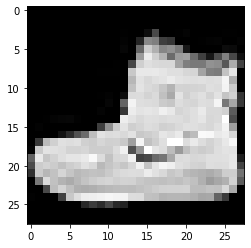

In [26]:
plt.imshow(train_images[0], cmap="gray")

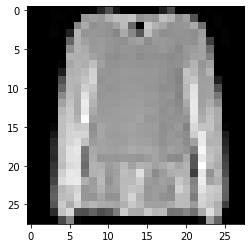

In [27]:
plt.imshow(train_images[18],cmap="gray")